# Covid19 Data Analysis Notebook
------------------------------------------

### Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


### Importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv"

In [12]:
df_covid = pd.read_csv('./covid19_Confirmed_dataset.csv')
df_covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Check the shape of the dataframe to see the number of rows and columns

In [3]:
df_covid.shape

(266, 104)

#### Check some information of the dataframe

In [4]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.3+ KB


In [5]:
df_covid.isna().sum()

Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/26/20             0
4/27/20             0
4/28/20             0
4/29/20             0
4/30/20             0
Length: 104, dtype: int64

### Delete the useless columns

In [13]:
df_covid.drop(['Lat', 'Long', 'Province/State'], axis=1, inplace=True)

### Aggregating the rows by the country

In [15]:
df_covid_grp = df_covid.groupby('Country/Region').sum()

In [16]:
df_covid_grp.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
df_covid_grp.shape

(187, 101)

### Visualizing data related to a country for example Germany, China and Turkey
Visualization always helps for better understanding of our data.

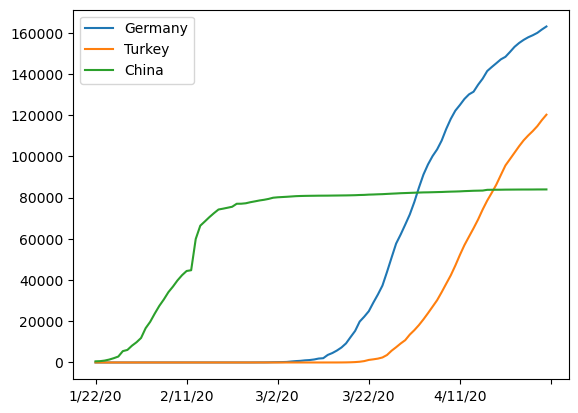

In [17]:
df_covid_grp.loc['Germany'].plot()
df_covid_grp.loc['Turkey'].plot()
df_covid_grp.loc['China'].plot()
plt.legend()

### Calculating a good measure 
We need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

<Axes: >

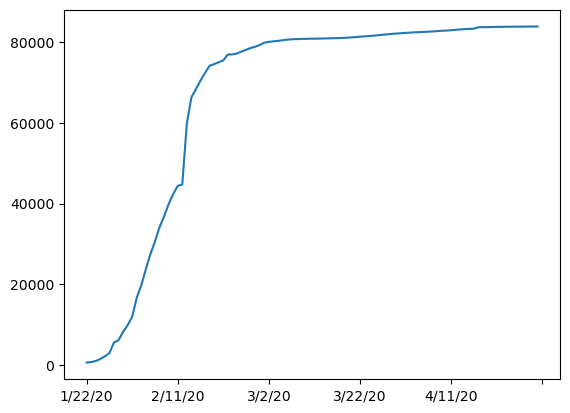

In [18]:
df_covid_grp.loc['China'].plot()

<Axes: >

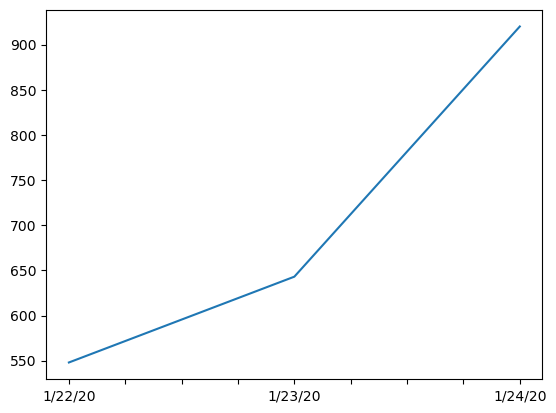

In [19]:
# Spread of the virus in the first three days in China
df_covid_grp.loc['China'][:3].plot()

### Calculating the first derivative of the curve

<Axes: >

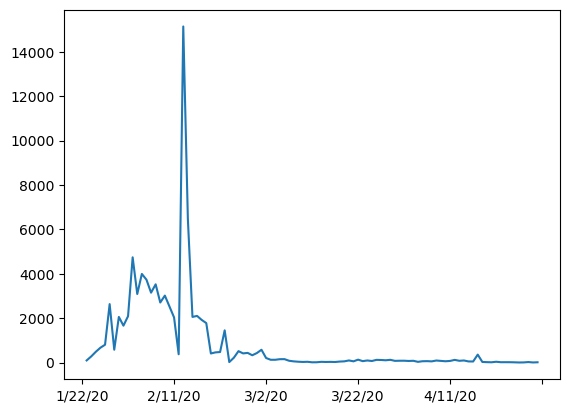

In [20]:
df_covid_grp.loc['China'].diff().plot()

### Find maxmimum infection rate for China, Germany and Turkey

In [21]:
# This number represents the highest number of new infections in a single day
df_covid_grp.loc['China'].diff().max()

15136.0

In [22]:
df_covid_grp.loc['Germany'].diff().max()

6933.0

In [23]:
df_covid_grp.loc['Turkey'].diff().max()

5138.0

### Find maximum infection rate for all of the countries. 

In [26]:
countries = list(df_covid_grp.index) # list of all countries
max_infection_rates = []
for country in countries:
    max_infection_rates.append(df_covid_grp.loc[country].diff().max()) # add max infection rate for each country
df_covid_grp['max_infection_rate'] = max_infection_rates # add the results as a new column

### Create a new dataframe with only needed column 

In [28]:
corona_data = pd.DataFrame(df_covid_grp["max_infection_rate"])

In [29]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0



#### - Importing the WorldHappinessReport.csv dataset
#### - selecting needed columns for our analysis 
#### - join the datasets 
#### - calculate the correlations as the result of our analysis

### Importing the dataset

In [35]:
happiness_report = pd.read_csv('./worldwide_happiness_report.csv')

In [31]:
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Drop the useless columns 

In [36]:
useless_columns = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']

In [37]:
happiness_report.drop(useless_columns, axis=1, inplace=True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Set country as the index

In [40]:
happiness_report.set_index('Country or region', inplace=True)

In [41]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Join two dataset we have prepared  

#### Corona Dataset :

In [42]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [43]:
corona_data.shape

(187, 1)

In [44]:
corona_data.isna().sum()

max_infection_rate    0
dtype: int64

#### wolrd happiness report Dataset :

In [56]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [45]:
happiness_report.shape

(156, 4)

In [46]:
happiness_report.isna().sum()

GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
dtype: int64

In [57]:
# number of countries are different in both data sets, 156 and 187. let's use inner join
df = corona_data.join(happiness_report, how='inner')
df

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
Australia,497.0,1.372,1.548,1.036,0.557
Austria,1321.0,1.376,1.475,1.016,0.532
Azerbaijan,105.0,1.043,1.147,0.769,0.351
Bahrain,301.0,1.362,1.368,0.871,0.536
Bangladesh,641.0,0.562,0.928,0.723,0.527


### Correlation matrix 

In [59]:
df.corr().round(3)

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000,0.250,0.192,0.289,0.078
GDP per capita,0.250,1.000,0.759,0.863,0.395
Social support,0.192,0.759,1.000,0.765,0.456
Healthy life expectancy,0.289,0.863,0.765,1.000,0.428
Freedom to make life choices,0.078,0.395,0.456,0.428,1.000


### Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [60]:
df.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Plotting GDP vs maximum Infection rate

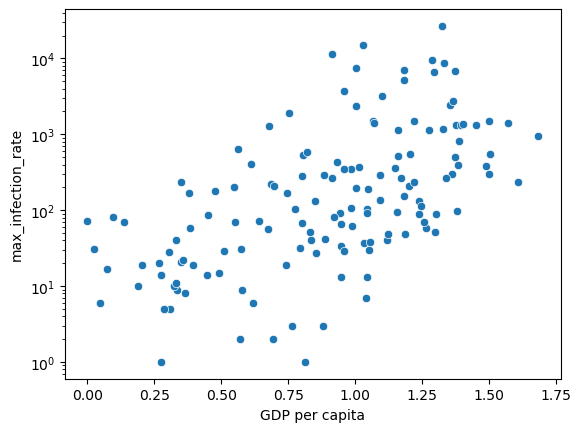

In [80]:
sns.scatterplot(x=df['GDP per capita'], y=df['max_infection_rate'])
plt.yscale('log')

In [ ]:
plt.plot(x, regression_line, color='red', label='Regression Line')

### Plotting Social support vs maximum Infection rate

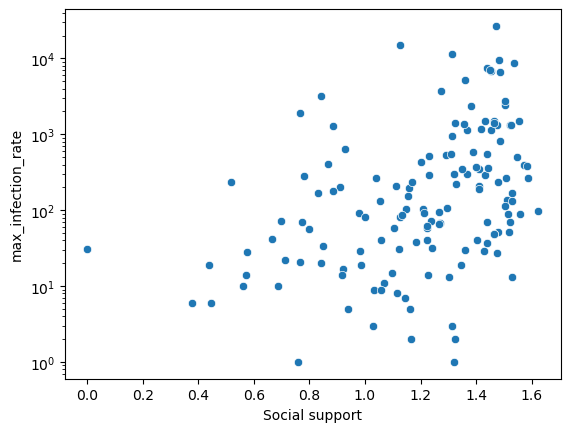

In [85]:
sns.scatterplot(x=df['Social support'], y=df['max_infection_rate'])
plt.yscale('log')

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

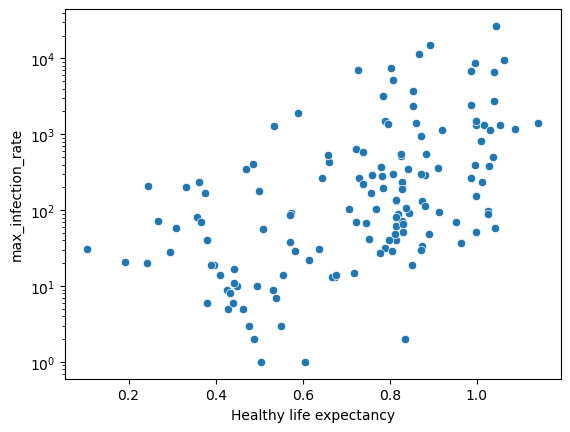

In [89]:
sns.scatterplot(x=df['Healthy life expectancy'], y=df['max_infection_rate'])
plt.yscale('log')

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

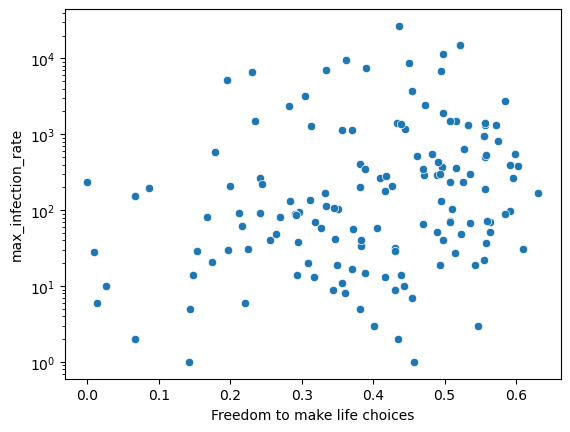

In [90]:
sns.scatterplot(x=df['Freedom to make life choices'], y=df['max_infection_rate'])
plt.yscale('log')